In [196]:
# we first import our models that we are going to work with.
import pandas as pd   # for data manipulation
import numpy as np   # for working with arrays
import matplotlib.pyplot as plt  # for visualization purposes
import seaborn as sns      # supports matplotlib in rendering good and beautiful charts.
sns.set()
import statsmodels as sm   # contains good statistical tools for modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor  # ensemble methods for regression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error

from sklearn import preprocessing  # for data preprocessing and scaling

# Adding a constant variable
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

In [197]:
# Import Excel data into pandas
greeks_data=pd.read_csv("greeks.csv")
greeks_data


,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [198]:
# Import train data
train_data= pd.read_csv("train.csv")
data= train_data.round(2)
data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.21,3109.03,85.20,22.39,8.14,0.70,0.03,9.81,5.56,...,7.30,1.74,0.09,11.34,72.61,2003.81,22.14,69.83,0.12,1
1,007255e47698,0.15,978.76,85.20,36.97,8.14,3.63,0.03,13.52,1.23,...,0.17,0.50,0.57,9.29,72.61,27981.56,29.14,32.13,21.98,0
2,013f2bd269f5,0.47,2635.11,85.20,32.36,8.14,6.73,0.03,12.82,1.23,...,7.71,0.98,1.20,37.08,88.61,13676.96,28.02,35.19,0.20,0
3,043ac50845d5,0.25,3819.65,120.20,77.11,8.14,3.69,0.03,11.05,1.23,...,6.12,0.50,0.28,18.53,82.42,2094.26,39.95,90.49,0.16,0
4,044fb8a146ec,0.38,3733.05,85.20,14.10,8.14,3.94,0.05,3.40,102.15,...,8.15,48.50,0.12,16.41,146.11,8524.37,45.38,36.26,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.15,3130.06,123.76,9.51,13.02,3.50,0.08,8.55,2.80,...,0.17,1.26,0.07,8.97,217.15,8095.93,24.64,69.19,21.98,0
613,fd895603f071,0.44,5462.03,85.20,46.55,15.97,5.98,0.03,12.62,3.78,...,10.22,1.24,0.43,35.90,496.99,3085.31,29.65,124.81,0.15,0
614,fd8ef6377f76,0.43,2459.11,130.14,55.36,10.01,8.07,0.03,15.41,1.23,...,0.17,0.50,0.07,19.96,128.90,6474.65,26.17,119.56,21.98,0
615,fe1942975e40,0.36,1263.54,85.20,23.69,8.14,7.98,0.03,7.52,1.23,...,9.26,0.79,0.67,24.59,72.61,1965.34,25.12,37.16,0.18,0


In [199]:
# Import train data
test_data= pd.read_csv("test.csv")
df_test= test_data.round(2)
df_test

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
data.shape # display the shape of the data

(617, 58)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [202]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477196,3502.012950,118.624506,38.968622,10.129238,5.545575,0.063404,10.566872,8.053096,5350.388493,...,5.432078,3.534652,0.422228,20.724862,131.714327,14679.595122,31.489919,50.584311,8.531656,0.175041
std,0.468481,2300.322759,127.838882,69.728384,10.518445,2.551590,0.416742,4.350082,65.166756,3021.326729,...,11.496607,50.182020,1.305354,9.991997,144.181678,19352.959482,9.864329,36.266154,10.328017,0.380310
min,0.080000,192.590000,85.200000,3.180000,8.140000,0.700000,0.030000,3.400000,1.230000,1693.620000,...,0.170000,0.500000,0.070000,4.100000,72.610000,13.040000,9.430000,0.900000,0.000000,0.000000
25%,0.250000,2197.350000,85.200000,12.270000,8.140000,4.130000,0.030000,8.130000,1.230000,4155.700000,...,0.170000,0.500000,0.070000,14.040000,72.610000,2798.990000,25.030000,23.010000,0.120000,0.000000
50%,0.350000,3120.320000,85.200000,20.530000,8.140000,5.030000,0.030000,10.460000,1.230000,4997.960000,...,3.030000,1.130000,0.250000,18.770000,72.610000,7838.270000,30.610000,41.010000,0.340000,0.000000
75%,0.560000,4361.640000,113.740000,39.140000,8.140000,6.430000,0.040000,12.970000,5.080000,6035.890000,...,6.240000,1.510000,0.540000,25.610000,127.590000,19035.710000,36.860000,67.930000,21.980000,0.000000
max,6.160000,28688.190000,1910.120000,630.520000,178.940000,38.270000,10.320000,38.970000,1463.690000,53060.600000,...,137.930000,1244.230000,31.370000,135.780000,1497.350000,143790.070000,81.210000,191.190000,21.980000,1.000000


In [203]:
# Checking duplicate values
print('Sum of duplicate values:{}\n'.format(data.duplicated().sum()))

Sum of duplicate values:0



In [204]:
data['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [205]:
m=[col for col in data.columns if data[col].isna().sum()!=0]
print(m)

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']


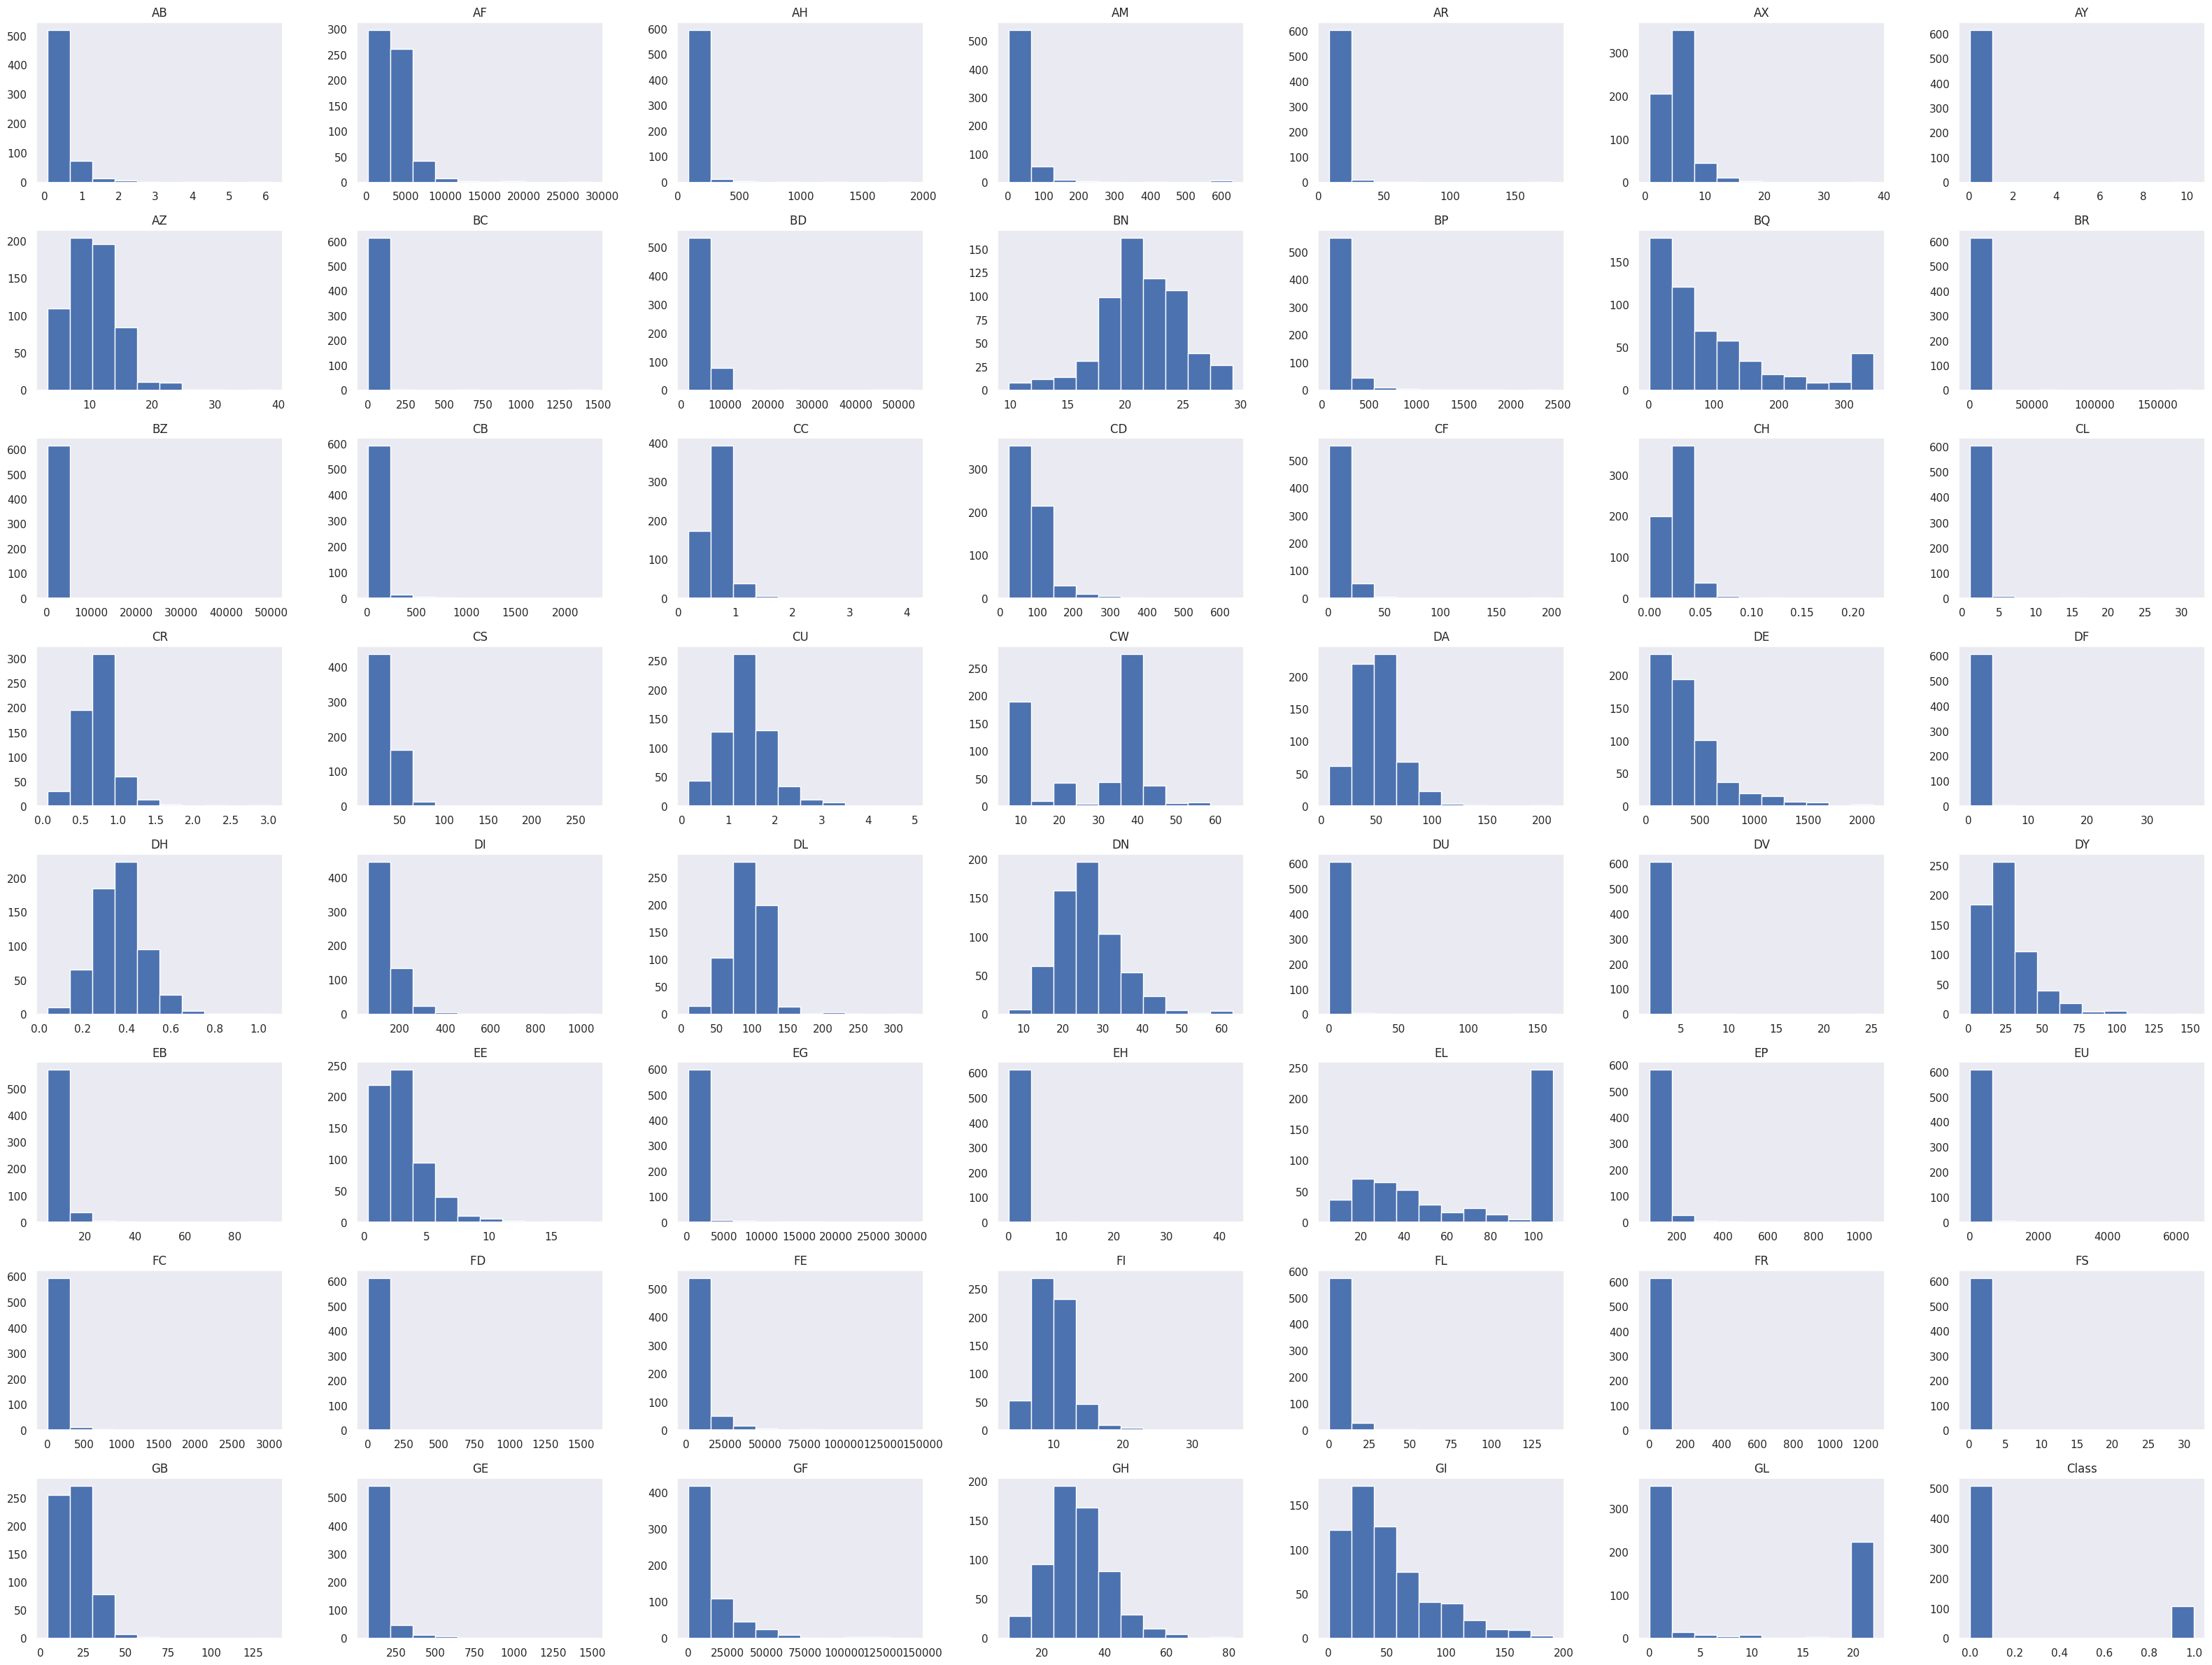

In [206]:
# let's visualize the distribution of the features
data.hist(figsize=(40,30),bins=10, grid=False)
plt.show()

In [207]:
# Replaced the na with median as the attributes are distributed either left or right skewed.
data['BQ'] = data['BQ'].fillna(data['BQ'].median())
data['CB'] = data['CB'].fillna(data['CB'].median())
data['CC'] = data['CC'].fillna(data['CC'].median())
data['DU'] = data['DU'].fillna(data['DU'].median())
data['EL'] = data['EL'].fillna(data['EL'].median())
data['FC'] = data['FC'].fillna(data['FC'].median())
data['FL'] = data['FL'].fillna(data['FL'].median())
data['FS'] = data['FS'].fillna(data['FS'].median())
data['GL'] = data['GL'].fillna(data['GL'].median())

In [208]:
sns.set(rc={"figure.figsize":(15, 15)})

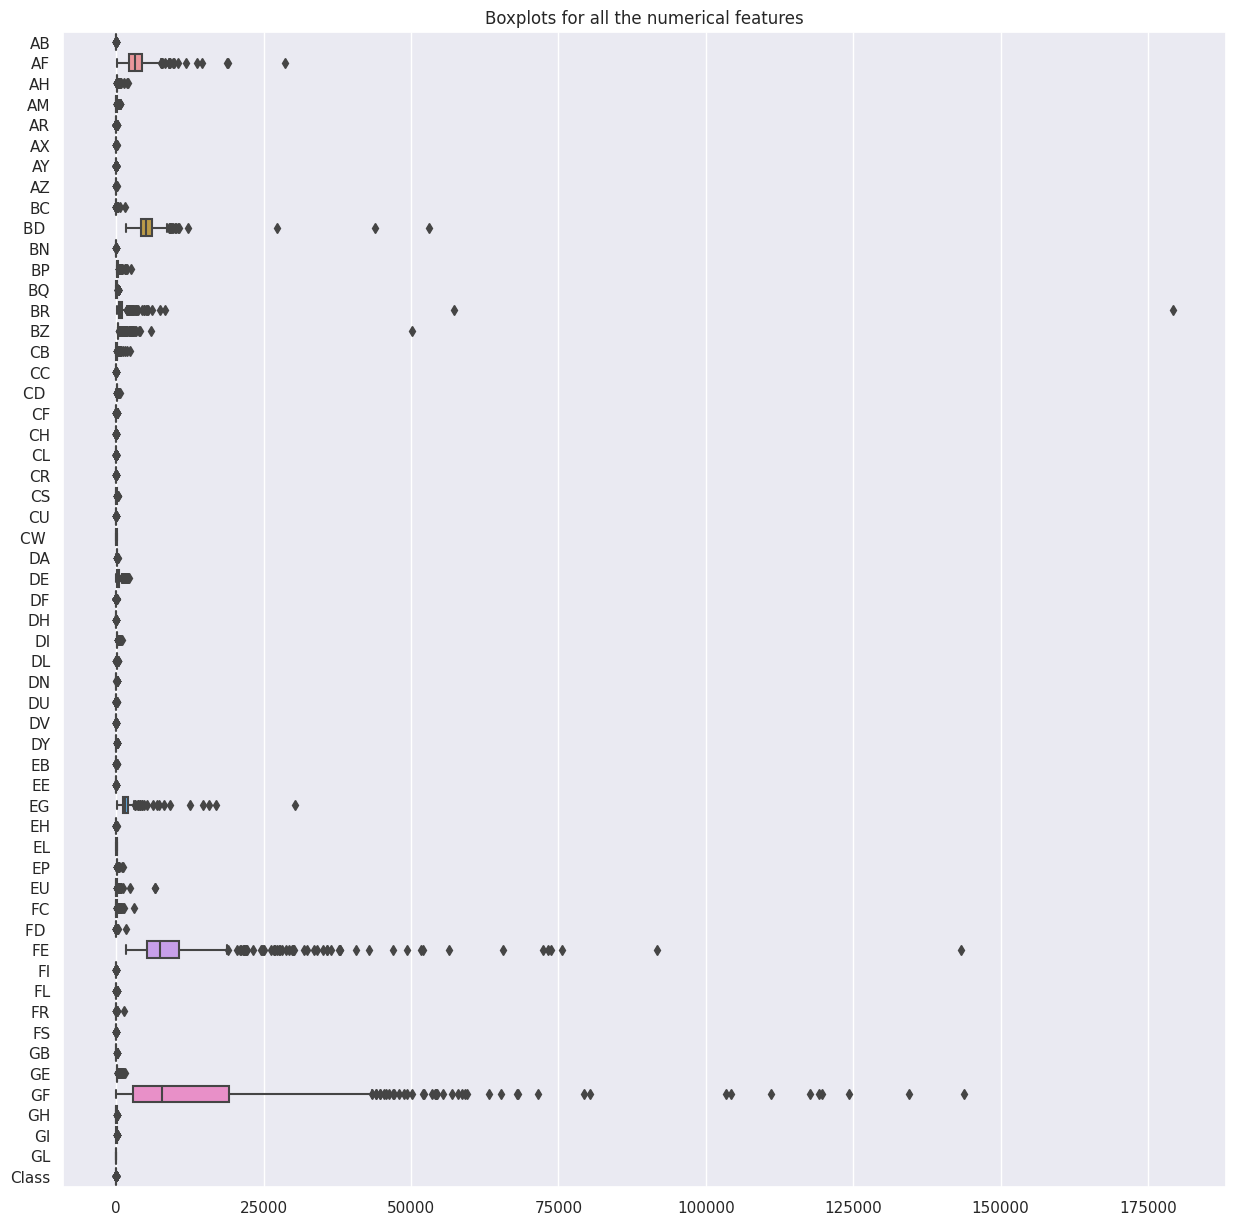

In [209]:
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data, orient="h")
sns.set(rc={"figure.figsize":(15, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()


In [210]:
sns.set(rc={"figure.figsize":(4,4)})

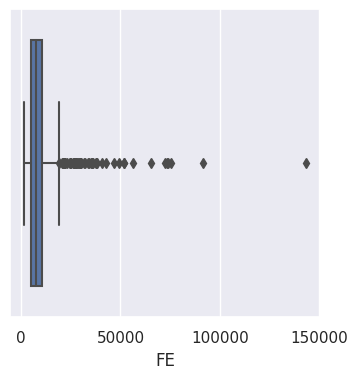

In [211]:
sns.boxplot(data = data, x = 'FE')
sns.set(rc={"figure.figsize":(3,4)})
# Display
plt.show()

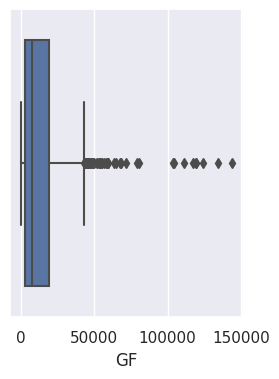

In [212]:
sns.boxplot(data = data, x = 'GF')
sns.set(rc={"figure.figsize":(4, 4)})
# Display
plt.show()

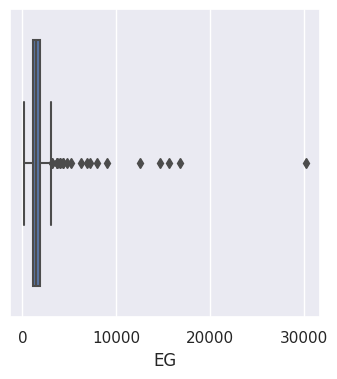

In [213]:

sns.boxplot(data = data, x = 'EG')
sns.set(rc={"figure.figsize":(5, 4)})
# Display
plt.show()

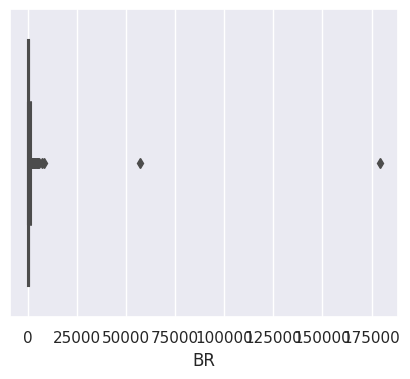

In [214]:
sns.boxplot(data = data, x = 'BR')
#sns.set(rc={"figure.figsize":(5,5)})
# Display
plt.show()


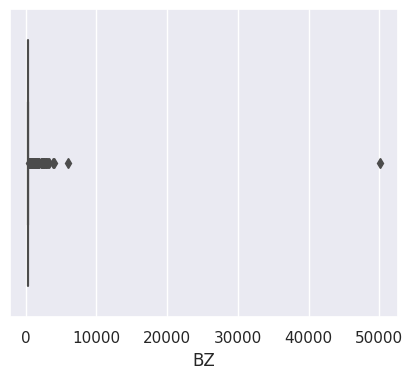

In [215]:
sns.boxplot(data = data, x = 'BZ',)
#sns.set(rc={"figure.figsize":(5,3)})
# Display
plt.show()

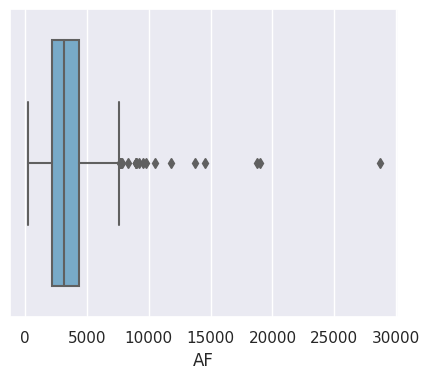

In [216]:
sns.boxplot(data = data, x = 'AF', palette="Blues")
#sns.set(rc={"figure.figsize":(6,3)})
# Display
plt.show()


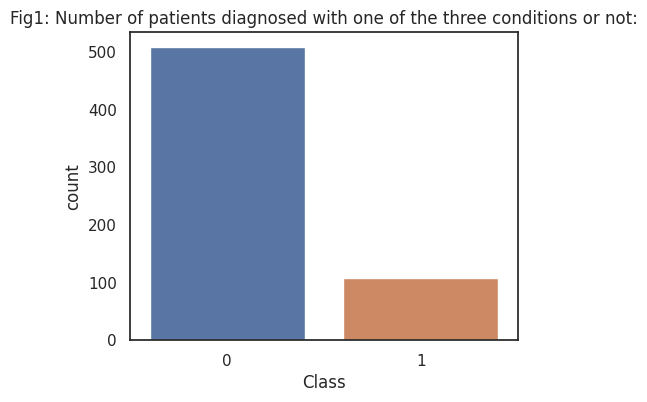

In [217]:
sns.set_style("white")
sns.countplot(x=data['Class'])
plt.title("Fig1: Number of patients diagnosed with one of the three conditions or not:" )
plt.show()

In [218]:
data['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [219]:
# To check the Outliers in Class as 1
data1=data.loc[data['Class']==1]

data1.shape

(108, 58)

In [220]:
sns.set(rc={"figure.figsize":(15, 15)})

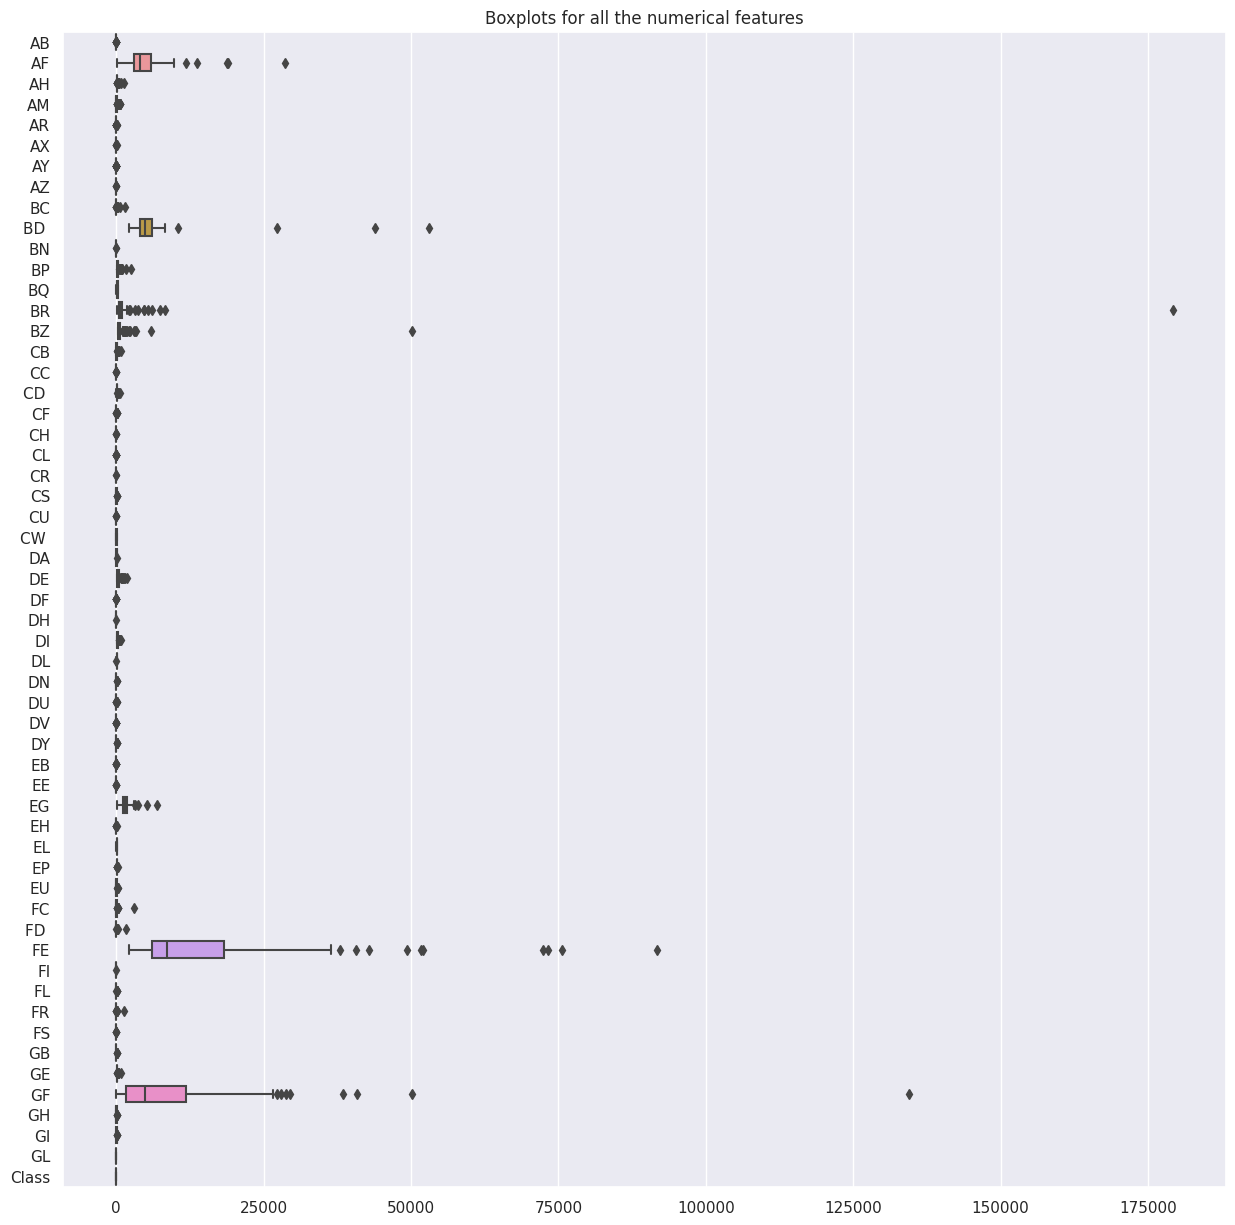

In [221]:
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data1, orient="h")
sns.set(rc={"figure.figsize":(15, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()

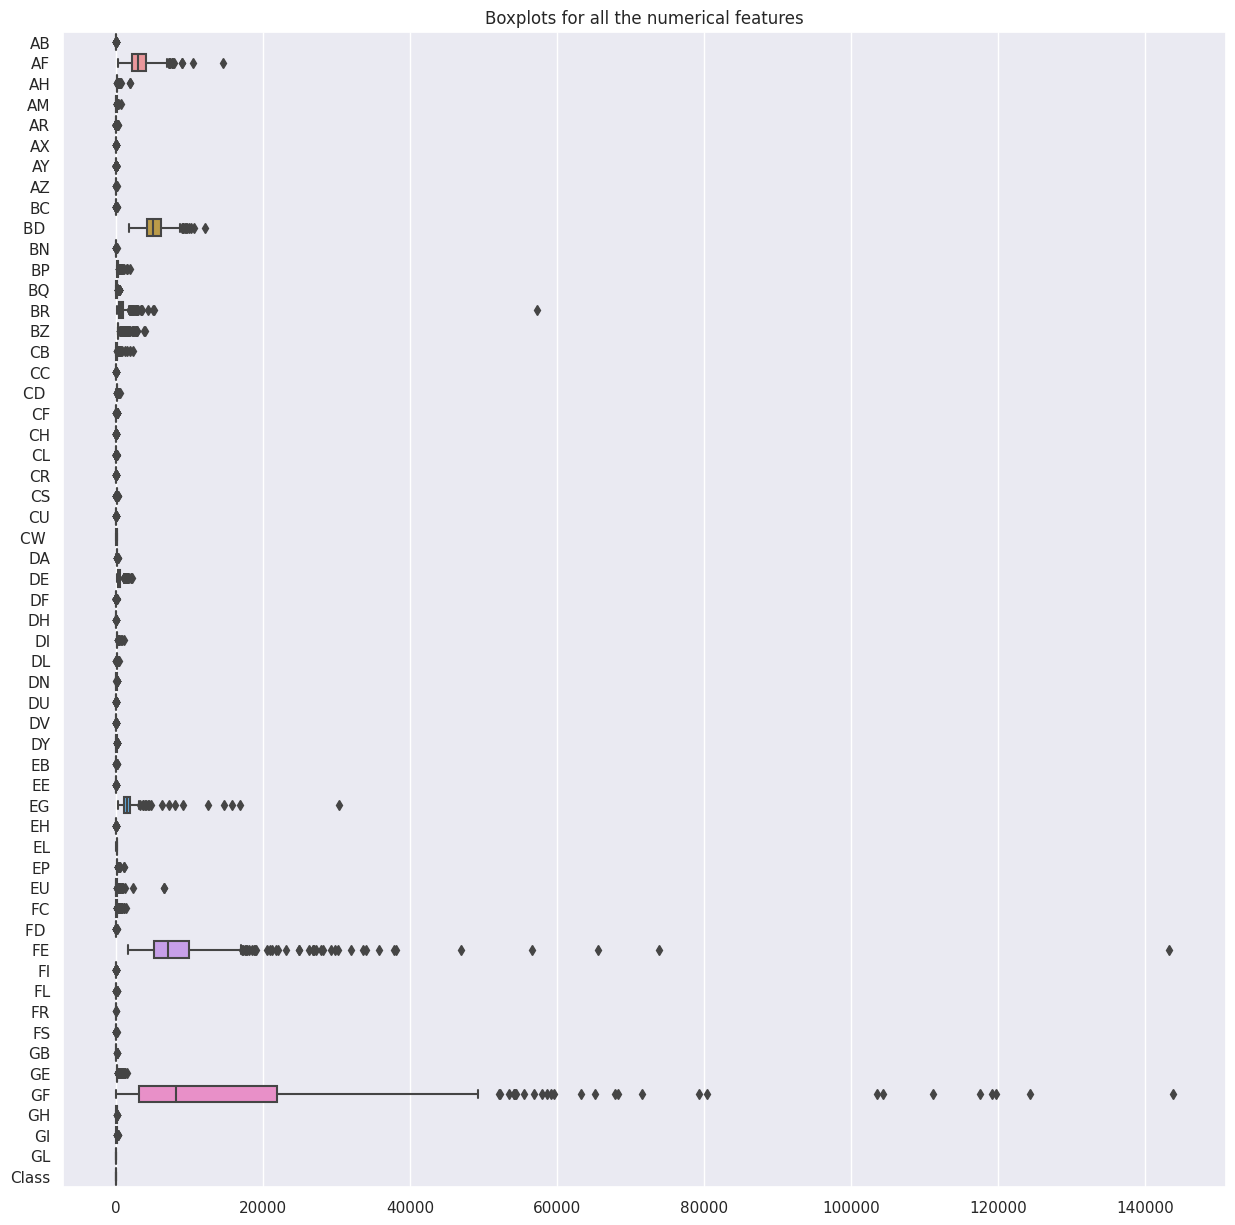

In [222]:
# To check the Outliers in Class as 0
data0=data.loc[data['Class']==0]
data0.shape
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data0, orient="h")
sns.set(rc={"figure.figsize":(14, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()


In [223]:
sns.set(rc={"figure.figsize":(5, 5)})

**Label Encoding for ED in Train data**

In [224]:
c = data.EJ.astype('category')

EJ_dict = dict(enumerate(c.cat.categories))

data['EJ'] = data.EJ.astype('category').cat.codes

data['EJ_OLD'] = data['EJ'].map(EJ_dict)
print (data)

               Id    AB       AF      AH      AM     AR    AX    AY     AZ  \
0    000ff2bfdfe9  0.21  3109.03   85.20   22.39   8.14  0.70  0.03   9.81   
1    007255e47698  0.15   978.76   85.20   36.97   8.14  3.63  0.03  13.52   
2    013f2bd269f5  0.47  2635.11   85.20   32.36   8.14  6.73  0.03  12.82   
3    043ac50845d5  0.25  3819.65  120.20   77.11   8.14  3.69  0.03  11.05   
4    044fb8a146ec  0.38  3733.05   85.20   14.10   8.14  3.94  0.05   3.40   
..            ...   ...      ...     ...     ...    ...   ...   ...    ...   
612  fd3dafe738fd  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   
613  fd895603f071  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   
614  fd8ef6377f76  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   
615  fe1942975e40  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   
616  ffcca4ded3bb  0.48  2672.53  546.66  112.01   8.14  3.20  0.12   3.40   

         BC  ...     FR    FS     GB      GE        GF     GH  

In [225]:
# subset all categorical variables
df_categorical = data.select_dtypes(include=['object', 'datetime64[ns]'])
df_categorical.head()

,Id,EJ_OLD
0,000ff2bfdfe9,B
1,007255e47698,A
2,013f2bd269f5,B
3,043ac50845d5,B
4,044fb8a146ec,B


In [226]:
data=data.drop(['EJ_OLD'], axis=1)

In [227]:
data=data.drop(['Id'], axis=1)

**Label Encoding for the Test data**




In [228]:
c = df_test.EJ.astype('category')

EJ_dict = dict(enumerate(c.cat.categories))

df_test['EJ'] = df_test.EJ.astype('category').cat.codes

df_test['EJ_OLD'] = df_test['EJ'].map(EJ_dict)
print (df_test)

             Id   AB   AF   AH   AM   AR   AX   AY   AZ   BC  ...   FL   FR  \
0  00eed32682bb  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  010ebe33f668  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  02fa521e1838  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  040e15f562a2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  046e85c7cc7f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

    FS   GB   GE   GF   GH   GI   GL  EJ_OLD  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  

[5 rows x 58 columns]


In [229]:
x_test=df_test.drop(['EJ_OLD'], axis=1)

In [230]:
test=x_test.drop(['Id'], axis=1)

**Modeling Preparation**

In [231]:
# Modeling Preparation
y = data['Class']
x = data.drop(['Class'], axis = 1)


In [232]:
data.shape

(617, 57)

In [233]:
data.Class.value_counts()

0    509
1    108
Name: Class, dtype: int64

In [234]:
# Split data into test and train using stratify split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [235]:
# Feature before mean normalization
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indices and column names:
x_train = pd.DataFrame(x_train_array, index= x_train.index, columns= x_train.columns)
x_test_array = sc.fit_transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index= x_test.index, columns= x_test.columns)
# Test data normalization
df_test_array = sc.fit_transform(test.values)
test = pd.DataFrame(df_test_array, index= test.index, columns= test.columns)

In [236]:
#pip install -U imbalanced-learn

In [237]:
print("Before OverSampling, counts of Class '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of Class '0': {} \n".format(sum(y_train == 0)))


Before OverSampling, counts of Class '1': 86
Before OverSampling, counts of Class '0': 407 



In [238]:

# import SMOTE module from imblearn library
# pip3 install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of Class label as '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of Class label as '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (814, 56)
After OverSampling, the shape of train_y: (814,) 

After OverSampling, counts of Class label as '1': 407
After OverSampling, counts of Class label as '0': 407


In [239]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report and Confusion Matrix
LogisticRegression()
model=LogisticRegression(solver='liblinear',random_state=42).fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Confusion Matrix\n",confusion_matrix(y_test, model.predict(x_test)))

Confusion Matrix
 [[91 11]
 [ 4 18]]


In [240]:
print("Classification Report\n",classification_report(y_test, model.predict(x_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       102
           1       0.62      0.82      0.71        22

    accuracy                           0.88       124
   macro avg       0.79      0.86      0.81       124
weighted avg       0.90      0.88      0.89       124



In [241]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, log_loss
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
logloss= log_loss(y_test,model.predict_proba(x_test))
print("logloss: ", round(logloss, 2))
f1= f1_score(y_test,model.predict(x_test), average='binary')
print("F1-Score: ", round(f1, 2) )
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
mse = mean_squared_error(y_test, model.predict(x_test))
print('MSE: %.3f' % mse)


Accuracy: 0.879
logloss:  0.41
F1-Score:  0.71
Precision: 0.621
Recall: 0.818
MSE: 0.121


In [242]:
pred=model.predict_proba(test)
pred

array([[0.84862747, 0.15137253],
       [0.84862747, 0.15137253],
       [0.84862747, 0.15137253],
       [0.84862747, 0.15137253],
       [0.84862747, 0.15137253]])

In [243]:
#test_df = df_test.drop(['Id'], axis = 1)


In [244]:
test_df.dtypes

AB        float64
AF        float64
AH        float64
AM        float64
AR        float64
AX        float64
AY        float64
AZ        float64
BC        float64
BD        float64
BN        float64
BP        float64
BQ        float64
BR        float64
BZ        float64
CB        float64
CC        float64
CD        float64
CF        float64
CH        float64
CL        float64
CR        float64
CS        float64
CU        float64
CW        float64
DA        float64
DE        float64
DF        float64
DH        float64
DI        float64
DL        float64
DN        float64
DU        float64
DV        float64
DY        float64
EB        float64
EE        float64
EG        float64
EH        float64
EJ           int8
EL        float64
EP        float64
EU        float64
FC        float64
FD        float64
FE        float64
FI        float64
FL        float64
FR        float64
FS        float64
GB        float64
GE        float64
GF        float64
GH        float64
GI        float64
GL        

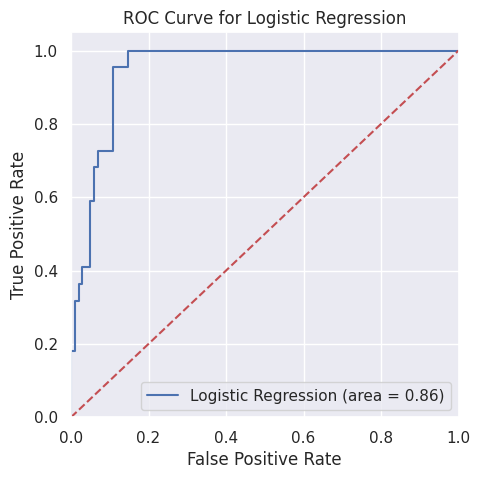

In [245]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

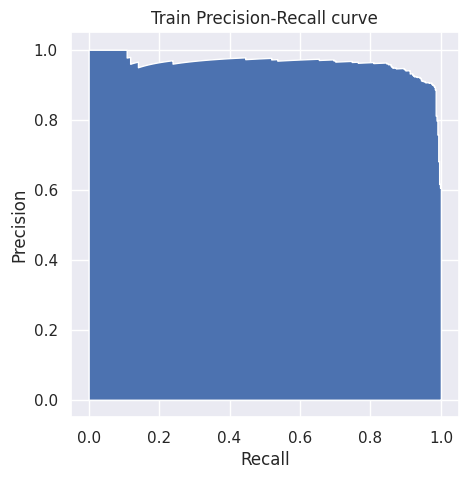

In [246]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, model.predict_proba(x_train)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

**Cross Validation in logistic Model**

In [247]:
# Using Stratified K fold CV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
folds= StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [248]:
from sklearn.metrics import log_loss, f1_score, recall_score, precision_score
#model.predict(x_test)

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    accuracy= model.score(X_test, y_test)
    logloss=log_loss(y_test,model.predict_proba(x_test))
    f1= f1_score(y_test,model.predict(x_test), average='binary')
    precision= precision_score(y_test,model.predict(x_test), average='binary')
    recall= recall_score(y_test,model.predict(x_test), average='binary')
    return accuracy,logloss, f1, precision, recall



In [249]:
metrics = []
i=0
for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    metrics.append(get_score(LogisticRegression(), x_train,x_test, y_train, y_test))
    i=i+1
    print("Fold",i,", Accuracy, logloss, F1 Score, Precision, Recall:", get_score(LogisticRegression(), x_train,x_test, y_train, y_test))




Fold 1 , Accuracy, logloss, F1 Score, Precision, Recall: (0.8870967741935484, 0.30770997605599715, 0.46153846153846156, 0.8571428571428571, 0.3157894736842105)
Fold 2 , Accuracy, logloss, F1 Score, Precision, Recall: (0.8951612903225806, 0.4380482285636004, 0.5185185185185185, 0.7777777777777778, 0.3888888888888889)
Fold 3 , Accuracy, logloss, F1 Score, Precision, Recall: (0.7560975609756098, 0.4866434097981372, 0.25, 0.38461538461538464, 0.18518518518518517)
Fold 4 , Accuracy, logloss, F1 Score, Precision, Recall: (0.7967479674796748, 0.46847930047590697, 0.24242424242424243, 0.4, 0.17391304347826086)
Fold 5 , Accuracy, logloss, F1 Score, Precision, Recall: (0.8617886178861789, 0.5096174591924842, 0.4848484848484849, 0.6666666666666666, 0.38095238095238093)


In [250]:
import pandas as pd
df = pd.DataFrame(metrics, columns=['Accuracy', 'logloss', 'F1-Score', 'Precision', 'Recall'])
accuracy_log=df.Accuracy.mean()
logloss_log= df.logloss.mean()
F1_score_log= df['F1-Score'].mean()
Precision_log= df.Precision.mean()
Recall_log = df.Recall.mean()
print("--------------Logistic Regression Model-----------------")
print("Accuracy: ", accuracy_log)
print("Logloss: ", logloss_log)
print("F1-Score: ", F1_score_log)
print("Precision: ", Precision_log)
print("Recall: ", Recall_log)

--------------Logistic Regression Model-----------------
Accuracy:  0.8393784421715186
Logloss:  0.4420996748172252
F1-Score:  0.3914659414659415
Precision:  0.6172405372405372
Recall:  0.28894579443778523


**Random Forest Classifier**

In [251]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix

In [252]:
# Random Forest
rfclass=RandomForestClassifier(n_estimators=100, random_state=42)
rfclass.fit(x_train, y_train)
rfypred=rfclass.predict(x_test)


In [253]:
print("Accuracy: ", accuracy_score(y_test, rfypred))
#rfclass.score(x_test, y_test)
print("Confusion Matrix\n",confusion_matrix(y_test, rfypred))

Accuracy:  0.943089430894309
Confusion Matrix
 [[100   2]
 [  5  16]]


In [254]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rfypred)
print('MSE: %.3f' % mse)

MSE: 0.057


Text(0.5, 0, 'Random Forest Feature Importance')

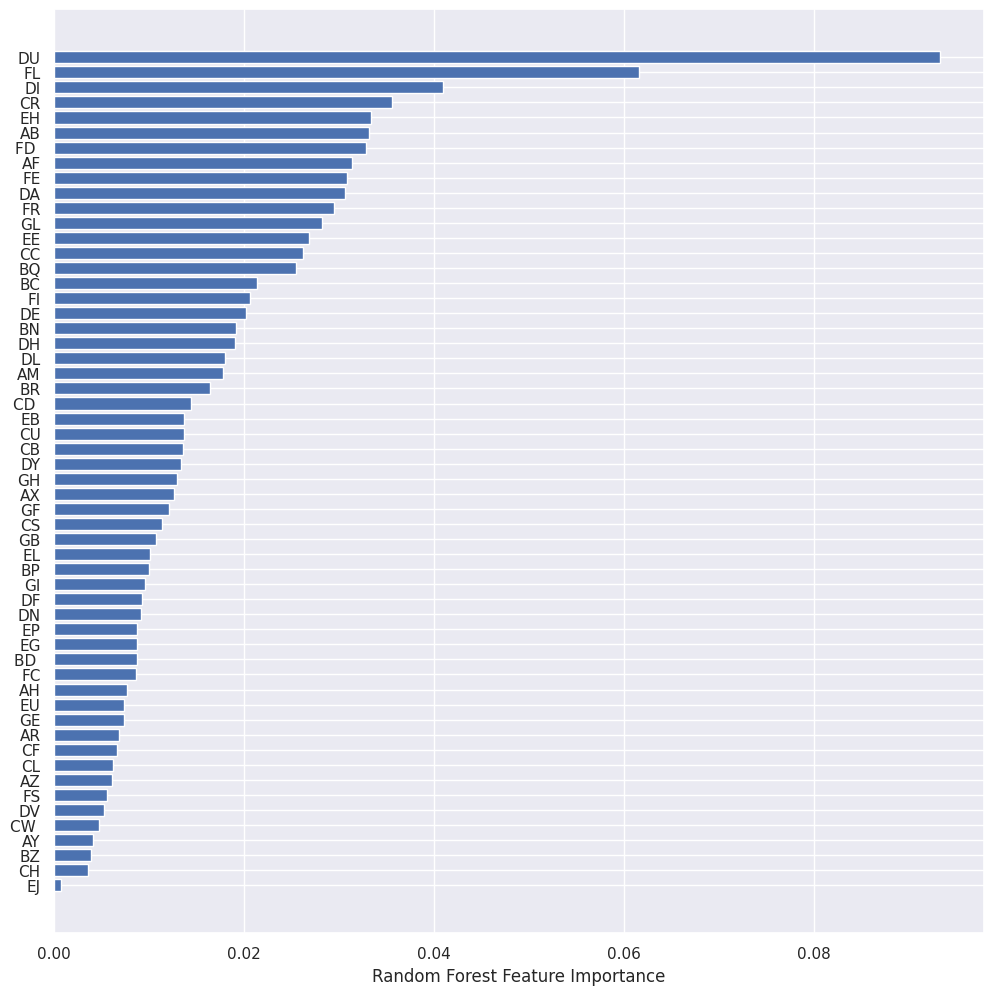

In [255]:
sorted_idx = rfclass.feature_importances_.argsort()
sns.set(rc={"figure.figsize":(12, 12)})
plt.barh(x.columns[sorted_idx], rfclass.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [256]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
print('Accuracy: %.3f' % accuracy_score(y_test, rfypred))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, rfclass.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,rfclass.predict(x_test), average='binary')
print("F1-score: ", round(f1,2))
print('Precision: %.3f' % precision_score(y_test, rfypred))
print('Recall: %.3f' % recall_score(y_test, rfypred))

Accuracy: 0.943
logloss:  0.22
F1-score:  0.82
Precision: 0.889
Recall: 0.762


In [257]:
# Calculating probablities for test data
pred1=rfclass.predict_proba(test)
pred1

array([[0.51, 0.49],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.51, 0.49]])

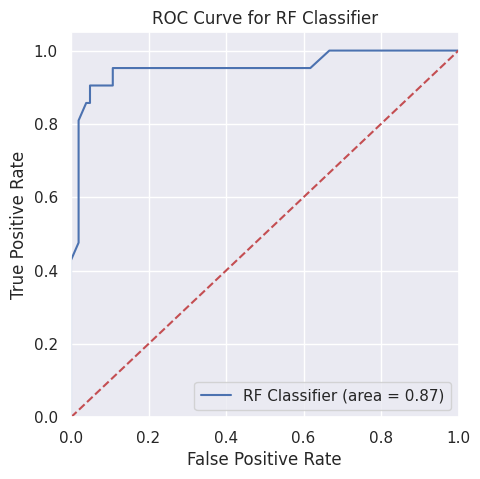

In [258]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(rc={"figure.figsize":(5, 5)})
logit_roc_auc = roc_auc_score(y_test, rfypred)
fpr, tpr, thresholds = roc_curve(y_test, rfclass.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

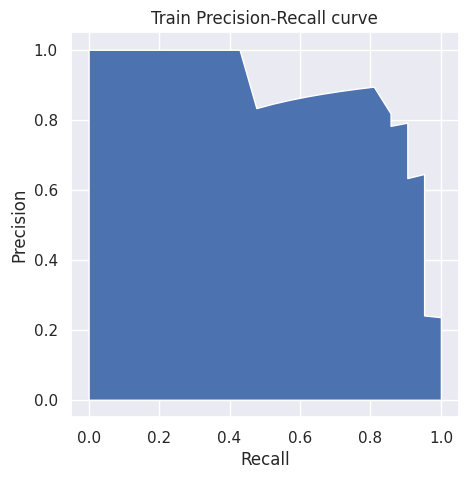

In [259]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, rfclass.predict_proba(x_test)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

Cross validation

In [260]:
# Using Stratified K fold CV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
kf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
folds= StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [261]:
from sklearn.metrics import log_loss, f1_score, recall_score, precision_score
#model.predict(x_test)

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    accuracy= model.score(X_test, y_test)
    logloss=log_loss(y_test,model.predict_proba(x_test))
    f1= f1_score(y_test,model.predict(x_test), average='binary')
    precision= precision_score(y_test,model.predict(x_test), average='binary')
    recall= recall_score(y_test,model.predict(x_test), average='binary')
    return accuracy,logloss, f1, precision, recall



In [262]:
metrics = []
i=0
for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    metrics.append(get_score(RandomForestClassifier(n_estimators=100, random_state=42), x_train,x_test, y_train, y_test))
    i=i+1
    print("Fold",i,", Accuracy, logloss, F1 Score, Precision, Recall:", get_score(RandomForestClassifier(n_estimators=100, random_state=42), x_train,x_test, y_train, y_test))




Fold 1 , Accuracy, logloss, F1 Score, Precision, Recall: (0.9274193548387096, 0.22052098644206203, 0.7428571428571429, 1.0, 0.5909090909090909)
Fold 2 , Accuracy, logloss, F1 Score, Precision, Recall: (0.8790322580645161, 0.25477070997676793, 0.6808510638297872, 0.64, 0.7272727272727273)
Fold 3 , Accuracy, logloss, F1 Score, Precision, Recall: (0.9105691056910569, 0.2496923258452963, 0.717948717948718, 0.8235294117647058, 0.6363636363636364)
Fold 4 , Accuracy, logloss, F1 Score, Precision, Recall: (0.9024390243902439, 0.25277631093092695, 0.6470588235294118, 0.8461538461538461, 0.5238095238095238)
Fold 5 , Accuracy, logloss, F1 Score, Precision, Recall: (0.943089430894309, 0.21567871267849512, 0.8205128205128205, 0.8888888888888888, 0.7619047619047619)


In [263]:
import pandas as pd
df = pd.DataFrame(metrics, columns=['Accuracy', 'logloss', 'F1-Score', 'Precision', 'Recall'])
accuracy_log=df.Accuracy.mean()
logloss_log= df.logloss.mean()
F1_score_log= df['F1-Score'].mean()
Precision_log= df.Precision.mean()
Recall_log = df.Recall.mean()
print("--------------Random Forest Classifier Model-----------------")
print("Accuracy: ", accuracy_log)
print("Logloss: ", logloss_log)
print("F1-Score: ", F1_score_log)
print("Precision: ", Precision_log)
print("Recall: ", Recall_log)

--------------Random Forest Classifier Model-----------------
Accuracy:  0.9125098347757671
Logloss:  0.2386878091747097
F1-Score:  0.7218457137355762
Precision:  0.8397144293614882
Recall:  0.648051948051948


**Hyperparameter tunning with CV for Random Forest Classifier:**

In [264]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [265]:

param_grid = {
    'n_estimators': [ 100, 150, 300, 900],
    'criterion' : ['gini', 'entrophy'],
    'max_features': ['sqrt','log2', None],
    'max_depth': [3, 6, 9, 12],
    'max_leaf_nodes': [3, 6, 9, 12],
}

In [269]:
# Using StratifiedKFold CV hyperparameter tuning
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid, n_iter = 100, cv = 5, verbose = 2, random_state = 42,
                               n_jobs = -1)

random_search.fit(x_train, y_train)
print(random_search.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [73]:
# model_random = RandomForestClassifier(max_depth=6,
 #                                     max_features=None,
 #                                     max_leaf_nodes=12,
 #                                     n_estimators=900)
# model_random.fit(x_train, y_train)
# y_pred_rand = model.predict(x_test)
# print(classification_report(y_pred_rand, y_test))*/

In [273]:
model_random = RandomForestClassifier(max_depth=9,
                                      max_features=None,
                                      max_leaf_nodes=12,
                                      n_estimators=150,
                                      random_state=42)
model_random.fit(x_train, y_train)
y_pred_rand = model.predict(x_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        86
           1       0.43      0.24      0.31        37

    accuracy                           0.67       123
   macro avg       0.58      0.55      0.55       123
weighted avg       0.64      0.67      0.64       123



In [271]:
logloss=log_loss(y_test,model_random.predict_proba(x_test))
logloss

0.20475278754693052

In [274]:
# Calculating probabilities for test data
pred1=model_random.predict_proba(test)
pred1

array([[0.49902644, 0.50097356],
       [0.49902644, 0.50097356],
       [0.49902644, 0.50097356],
       [0.49902644, 0.50097356],
       [0.49902644, 0.50097356]])

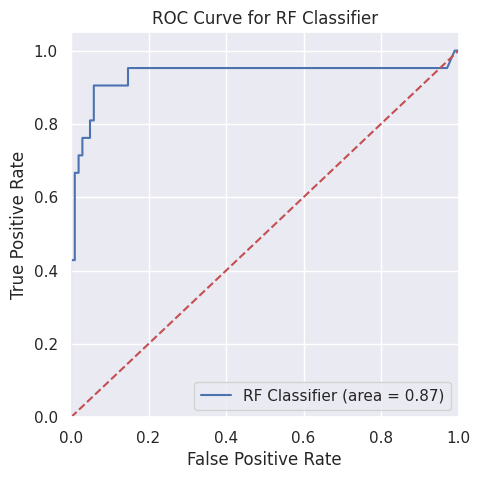

In [275]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(rc={"figure.figsize":(5, 5)})
logit_roc_auc = roc_auc_score(y_test, rfypred)
fpr, tpr, thresholds = roc_curve(y_test, model_random.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

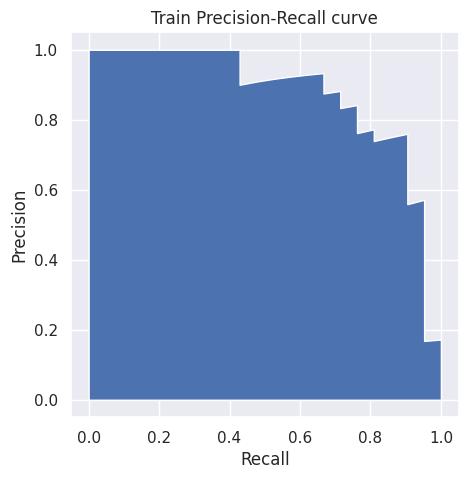

In [276]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, model_random.predict_proba(x_test)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [79]:
# Hyper Parameter tunning along with randomized searched cv


In [277]:

# Number of trees in Random Forest
rf_n_estimators = [300, 600, 900]
 #[int(x) for x in np.linspace(200, 1000, 5)]
#rf_n_estimators.append(1500)
#rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
#rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               #'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}


In [278]:
# Hyper Parameter tunning along with randomized searched cv

# Create the model to be tuned
rf_base = RandomForestClassifier()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid,
                               n_iter = 100, cv = 4, verbose = 2, random_state = 42,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

# View the best parameters from the random search
rf_random.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


KeyboardInterrupt: ignored

In [279]:
model_random = RandomForestClassifier(n_estimators= 300,
 min_samples_split= 2,
 min_impurity_decrease= 0.0,
 max_features= 'auto',
 max_depth= 35,
 bootstrap= False)
model_random.fit(x_train, y_train)
y_pred_rand = model_random.predict(x_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       104
           1       0.81      0.89      0.85        19

    accuracy                           0.95       123
   macro avg       0.89      0.93      0.91       123
weighted avg       0.95      0.95      0.95       123



In [280]:
logloss=log_loss(y_test,model_random.predict_proba(x_test))
logloss

0.20774950982410997

**Decision Tree Classifier**

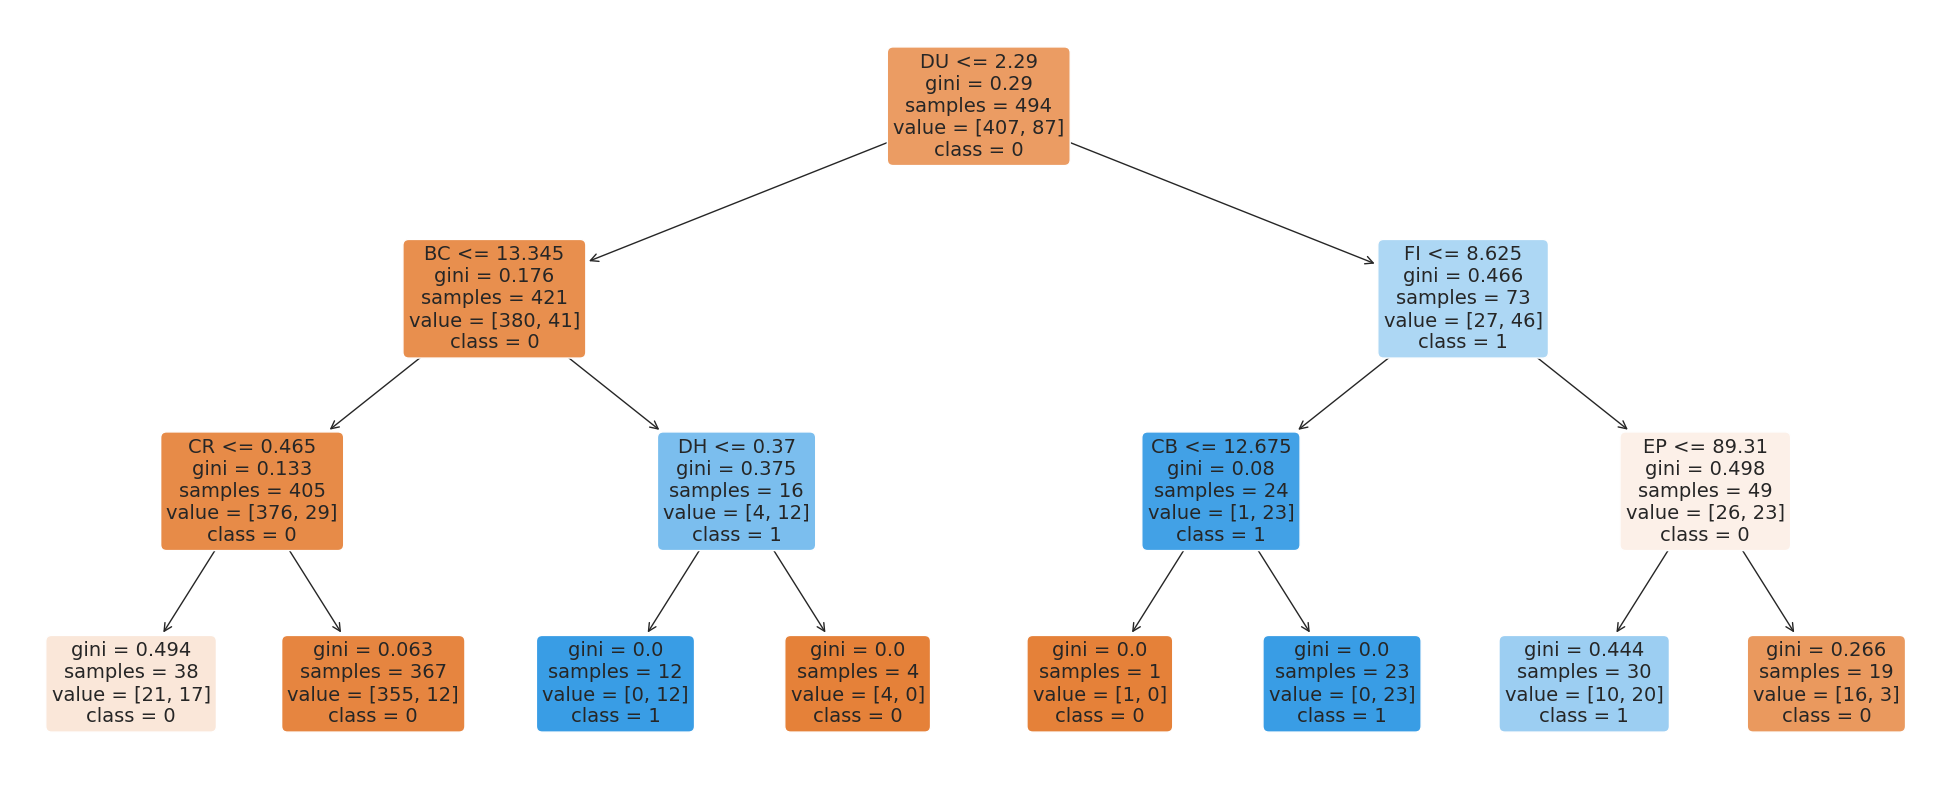

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,metrics
treemodel= DecisionTreeClassifier(max_depth=3)
treemodel.fit(x_train, y_train)
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel, feature_names=x.columns.values.tolist(), class_names=['0', '1'], filled= True, rounded=True, fontsize=14)

In [82]:
model= treemodel.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred= model.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.8780487804878049


In [83]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))

Confusion Matrix
 [[97  5]
 [10 11]]


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,model.predict(x_test), average='binary')
print("F1-score: ", round(f1,2))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.878
logloss:  0.84
F1-score:  0.59
Precision: 0.688
Recall: 0.524


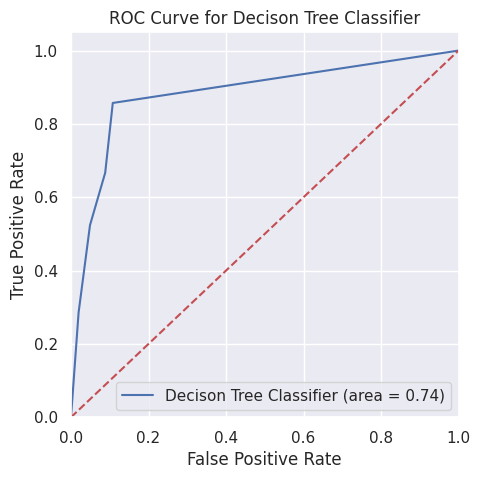

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decison Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decison Tree Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

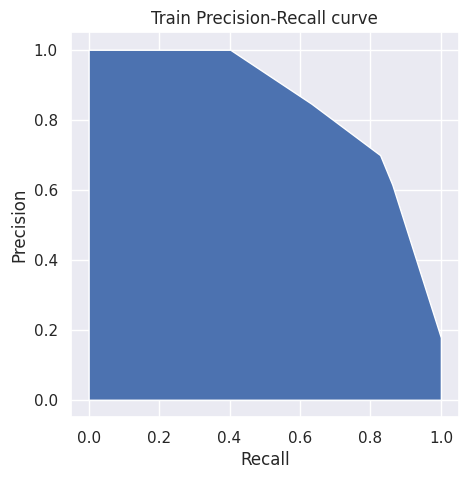

In [86]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, model.predict_proba(x_train)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [88]:
metrics = []
i=0
for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    metrics.append(get_score(DecisionTreeClassifier(max_depth=3), x_train,x_test, y_train, y_test))
    i=i+1
    print("Fold",i,", Accuracy, logloss, F1 Score, Precision, Recall:", DecisionTreeClassifier(max_depth=3), x_train,x_test, y_train, y_test)




Fold 1 , Accuracy, logloss, F1 Score, Precision, Recall: DecisionTreeClassifier(max_depth=3)        AB       AF      AH      AM     AR    AX    AY     AZ     BC      BD   \
121  1.14  1649.24  170.37   59.55  10.55  8.72  0.15  10.27   8.35  8128.66   
122  0.52  5674.70  119.92   34.73   8.14  2.86  0.03  15.68   1.23  7334.22   
123  0.67  1418.86  124.29   16.24  10.79  4.59  0.17  12.70  10.76  5353.72   
124  0.44  1466.48  123.91    4.80   8.14  5.08  0.03   7.63   1.23  3007.55   
125  0.50  4402.37  149.93   24.11   8.14  6.05  0.03  10.30   1.23  3237.76   
..    ...      ...     ...     ...    ...   ...   ...    ...    ...      ...   
612  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   2.80  4157.68   
613  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   3.78  5654.08   
614  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   1.23  5888.88   
615  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   1.23  4517.87   
616  0.48  2672.53  546.66 

In [89]:
import pandas as pd
df = pd.DataFrame(metrics, columns=['Accuracy', 'logloss', 'F1-Score', 'Precision', 'Recall'])
accuracy_log=df.Accuracy.mean()
logloss_log= df.logloss.mean()
F1_score_log= df['F1-Score'].mean()
Precision_log= df.Precision.mean()
Recall_log = df.Recall.mean()
print("--------------Gradient Boosting CLassifier Classifier Model-----------------")
print("Accuracy: ", accuracy_log)
print("Logloss: ", logloss_log)
print("F1-Score: ", F1_score_log)
print("Precision: ", Precision_log)
print("Recall: ", Recall_log)

--------------Gradient Boosting CLassifier Classifier Model-----------------
Accuracy:  0.8589955415683189
Logloss:  0.6989763829782764
F1-Score:  0.5428970774592894
Precision:  0.6327777777777778
Recall:  0.4995670995670996


**Gradient Boosting Classifier**

In [90]:
gbclass= GradientBoostingClassifier(random_state=42, n_estimators=900)
gbclass.fit(x_train, y_train)
gbypred=gbclass.predict(x_test)

In [91]:
gbclass.score(x_test, y_test)

0.9349593495934959

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, gbclass.predict(x_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbclass.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,gbclass.predict(x_test), average='binary')
print("F1-Score: ", f1)
print('Precision: %.3f' % precision_score(y_test, gbypred))
print('Recall: %.3f' % recall_score(y_test, gbypred))
mse = mean_squared_error(y_test, gbypred)
print('MSE: %.3f' % mse)

Accuracy: 0.935
logloss:  0.47
F1-Score:  0.8095238095238095
Precision: 0.810
Recall: 0.810
MSE: 0.065


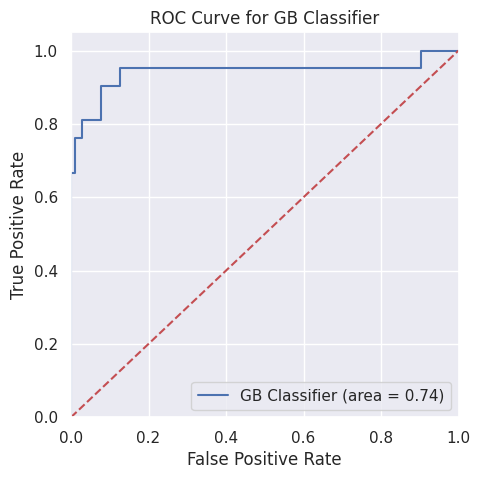

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, gbclass.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GB Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

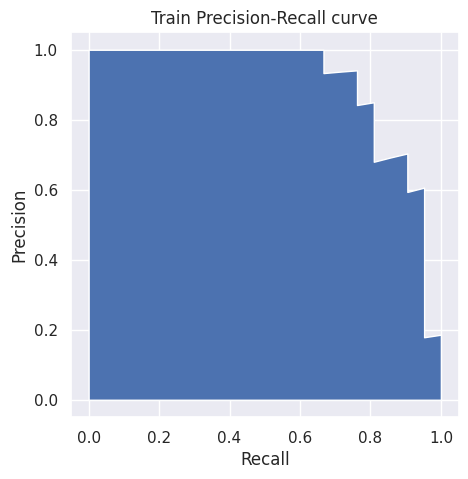

In [95]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, gbclass.predict_proba(x_test)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");



```
# This is formatted as code **bold text**
```



In [96]:
metrics = []
i=0
for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    metrics.append(get_score(GradientBoostingClassifier(random_state=42, n_estimators=1000), x_train,x_test, y_train, y_test))
    i=i+1
    print("Fold",i,", Accuracy, logloss, F1 Score, Precision, Recall:", GradientBoostingClassifier(random_state=42, n_estimators=1000), x_train,x_test, y_train, y_test)




Fold 1 , Accuracy, logloss, F1 Score, Precision, Recall: GradientBoostingClassifier(n_estimators=1000, random_state=42)        AB       AF      AH      AM     AR    AX    AY     AZ     BC      BD   \
121  1.14  1649.24  170.37   59.55  10.55  8.72  0.15  10.27   8.35  8128.66   
122  0.52  5674.70  119.92   34.73   8.14  2.86  0.03  15.68   1.23  7334.22   
123  0.67  1418.86  124.29   16.24  10.79  4.59  0.17  12.70  10.76  5353.72   
124  0.44  1466.48  123.91    4.80   8.14  5.08  0.03   7.63   1.23  3007.55   
125  0.50  4402.37  149.93   24.11   8.14  6.05  0.03  10.30   1.23  3237.76   
..    ...      ...     ...     ...    ...   ...   ...    ...    ...      ...   
612  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   2.80  4157.68   
613  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   3.78  5654.08   
614  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   1.23  5888.88   
615  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   1.23  4517.87   


In [97]:
import pandas as pd
df = pd.DataFrame(metrics, columns=['Accuracy', 'logloss', 'F1-Score', 'Precision', 'Recall'])
accuracy_log=df.Accuracy.mean()
logloss_log= df.logloss.mean()
F1_score_log= df['F1-Score'].mean()
Precision_log= df.Precision.mean()
Recall_log = df.Recall.mean()
print("--------------Gradient Boosting CLassifier Classifier Model-----------------")
print("Accuracy: ", accuracy_log)
print("Logloss: ", logloss_log)
print("F1-Score: ", F1_score_log)
print("Precision: ", Precision_log)
print("Recall: ", Recall_log)

--------------Gradient Boosting CLassifier Classifier Model-----------------
Accuracy:  0.902806189352216
Logloss:  0.6976399043112007
F1-Score:  0.7192014126224653
Precision:  0.7423517658811776
Recall:  0.7038961038961039


**Hyper parameter tuning for XGBoost Classifier**

In [128]:
import xgboost as xgb

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBClassifier(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         cv= 5,
                         n_iter=100,
                         verbose=1,
                         random_state=42)
clf.fit(x, y)
print("Best parameters:", clf.best_params_)






Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}


In [131]:

final_cl = xgb.XGBClassifier(
    **clf.best_params_,
    objective="binary:logistic",
    random_state=42
)
model_xgb= final_cl.fit(x_train, y_train)



In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, model_xgb.predict(x_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model_xgb.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,model_xgb.predict(x_test), average='binary')
print("F1-Score: ", f1)
print('Precision: %.3f' % precision_score(y_test, model_xgb.predict(x_test)))
print('Recall: %.3f' % recall_score(y_test,  model_xgb.predict(x_test)))
mse = mean_squared_error(y_test,  model_xgb.predict(x_test))
print('MSE: %.3f' % mse)

Accuracy: 0.951
logloss:  0.15
F1-Score:  0.8500000000000001
Precision: 0.895
Recall: 0.810
MSE: 0.049


In [133]:
model_xgb.predict_proba(test)

array([[0.8945872, 0.1054128],
       [0.8945872, 0.1054128],
       [0.8945872, 0.1054128],
       [0.8945872, 0.1054128],
       [0.8945872, 0.1054128]], dtype=float32)

Text(0.5, 0, 'XGBoost Feature Importance')

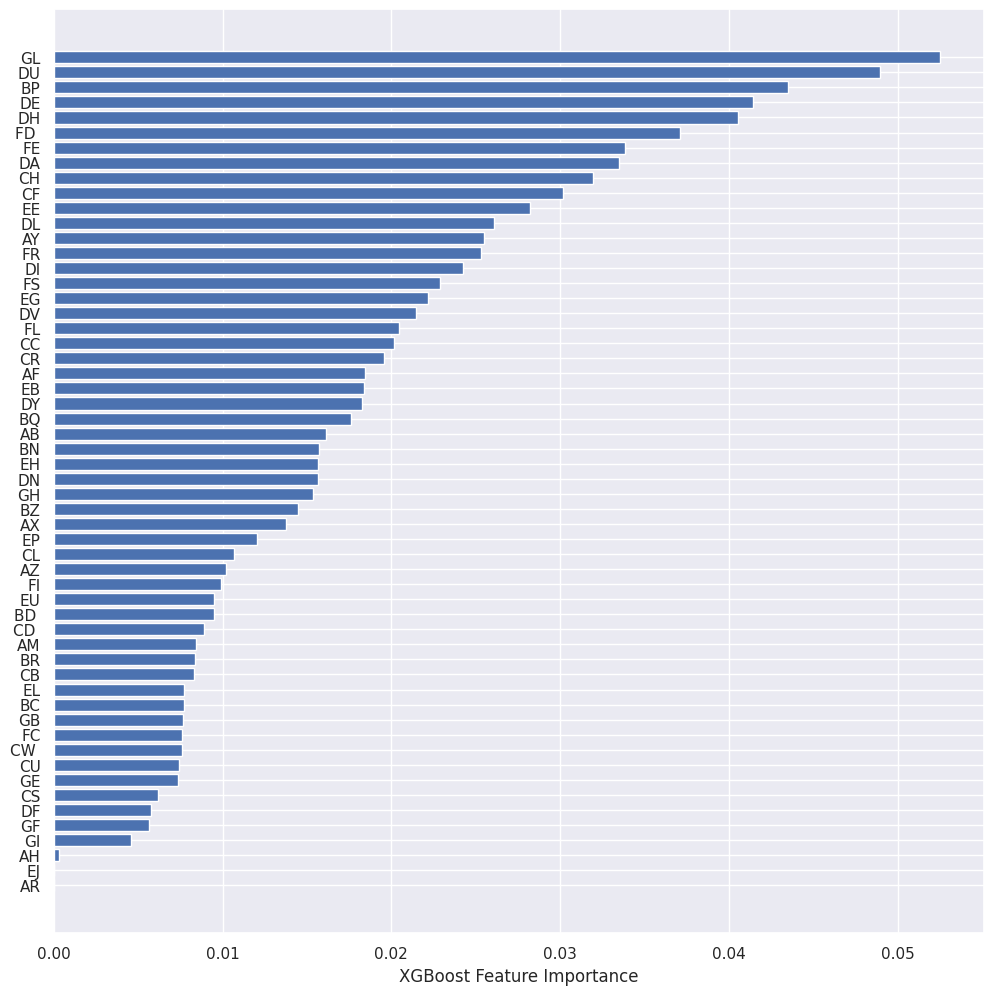

In [135]:
sorted_idx = model_xgb.feature_importances_.argsort()
sns.set(rc={"figure.figsize":(12, 12)})
plt.barh(x.columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

**Random Forest Pipeline**

In [172]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(max_depth=9,
                                      max_features=None,
                                      max_leaf_nodes=12,
                                      n_estimators=150,
                                      random_state=42
))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(x_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier(max_depth=9,
                                      max_features=None,
                                      max_leaf_nodes=12,
                                      n_estimators=150,
                                      random_state=42
))])

pipe.score(x_test, y_test)



0.926829268292683

In [173]:
pipe.predict_proba(test)

array([[0.49902644, 0.50097356],
       [0.49902644, 0.50097356],
       [0.49902644, 0.50097356],
       [0.49902644, 0.50097356],
       [0.49902644, 0.50097356]])

In [174]:
log_loss(y_test, pipe.predict_proba(x_test))

0.2043886829437037

In [175]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, pipe.predict(x_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, pipe.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,pipe.predict(x_test), average='binary')
print("F1-Score: ", round(f1,2))
print('Precision: %.3f' % precision_score(y_test, pipe.predict(x_test)))
print('Recall: %.3f' % recall_score(y_test, pipe.predict(x_test)))
mse = mean_squared_error(y_test, pipe.predict(x_test))
print('MSE: %.3f' % mse)

Accuracy: 0.927
logloss:  0.2
F1-Score:  0.78
Precision: 0.800
Recall: 0.762
MSE: 0.073


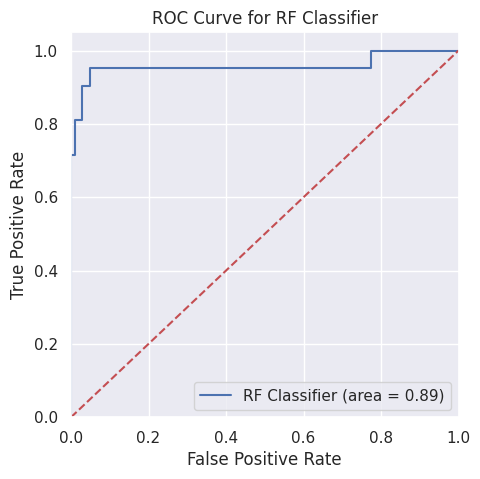

In [185]:
sns.set(rc={"figure.figsize":(5, 5)})
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pipe.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

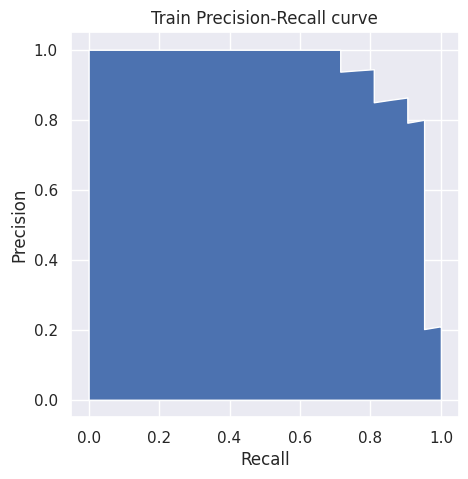

In [184]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pipe.predict_proba(x_test)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [191]:
# XGBoost Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pipe1 = Pipeline([('scaler', StandardScaler()), ('rf', xgb.XGBClassifier(
    **clf.best_params_,
    objective="binary:logistic",
    random_state=42
))])

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe1.fit(x_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('rf', xgb.XGBClassifier(
    **clf.best_params_,
    objective="binary:logistic",
    random_state=42
))])

pipe1.score(x_test, y_test)



0.9512195121951219

In [192]:
pipe1.predict_proba(test)

array([[0.8945944 , 0.10540561],
       [0.8945944 , 0.10540561],
       [0.8945944 , 0.10540561],
       [0.8945944 , 0.10540561],
       [0.8945944 , 0.10540561]], dtype=float32)

In [193]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, pipe1.predict(x_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, pipe1.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,pipe1.predict(x_test), average='binary')
print("F1-Score: ", round(f1,2))
print('Precision: %.3f' % precision_score(y_test, pipe1.predict(x_test)))
print('Recall: %.3f' % recall_score(y_test, pipe1.predict(x_test)))
mse = mean_squared_error(y_test, pipe1.predict(x_test))
print('MSE: %.3f' % mse)

Accuracy: 0.951
logloss:  0.15
F1-Score:  0.85
Precision: 0.895
Recall: 0.810
MSE: 0.049


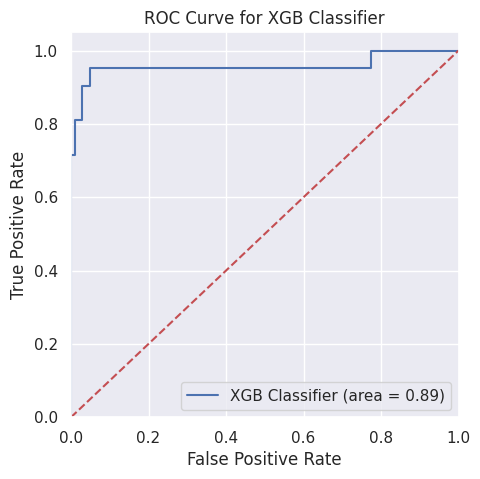

In [194]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pipe1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, pipe1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGB Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

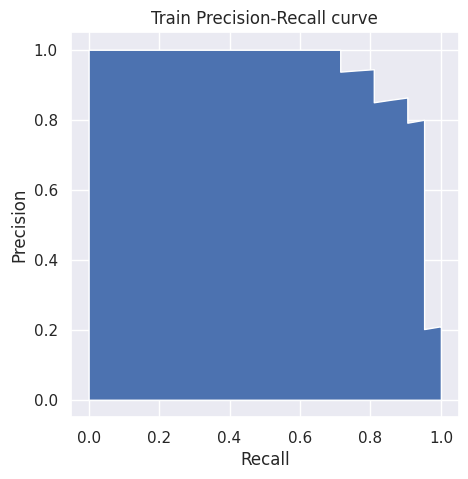

In [195]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pipe1.predict_proba(x_test)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");